In [14]:
import pandas
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data =  pandas.read_csv("train.csv")
print(sum(data['suspicious']))
print(sum(data['category'] == 0)) #Individual
print(sum(data[data['category'] == 0]['suspicious']) / sum(data['category'] == 0) * 100)
print(sum(data['category'] == 1)) #Business
print(sum(data[data['category'] == 1]['suspicious']) /sum(data['category'] == 1) * 100)
print(sum(data['category'] == 2)) #Organization
print(sum(data[data['category'] == 2]['suspicious']) / sum(data['category'] == 2) * 100)

9087
800146
1.0154396822579879
149780
0.48070503404993986
50074
0.48328473858689147


In [4]:
sum(data[data['is_pep'] == 1]['suspicious']) / sum(data['is_pep'] == 1) * 100
data_people = data[data['category'] == 0]
data_companies = data[data['category'] != 0]
data_companies = data_companies.drop("is_pep", axis=1)
data_companies = data_companies.drop("age", axis=1)

turnover normalize
turnover expand with log

combine transaction_count with io_ratio
to have transation_in and transation_out

nationaly make one-hot encodding

age we normalize and add 4 categories


In [6]:
data_companies.head()

,customer,category,suspicious,turnover,transaction_count,io_ratio,nationality,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,atm_deposit
1,90000001,1,0,1009400.35,2.0,0.5,33,78.49,79.0,3,1.0,0.635584,53.97,34.752298
23,90000023,1,0,1115814.55,1.0,1.0,94,41.57,84.0,2,1.0,0.329963,4528.47,0.000000
31,90000031,2,0,3224701.88,1.0,0.0,172,13.78,14.0,3,1.0,0.081462,3224701.88,287.056598
32,90000032,2,0,74551181.74,2.0,0.5,33,32.62,98.0,2,1.0,0.193763,2750.52,910.549164
33,90000033,1,0,50439.74,2.0,0.0,94,22.05,45.0,1,1.0,0.477056,0.00,520.397080


In [172]:
set(data_companies["nationality"])

{18, 32, 33, 45, 50, 66, 94, 113, 123, 134, 141, 172, 176, 191}

In [173]:
set(data_people["nationality"])

{18, 32, 33, 45, 47, 50, 66, 94, 113, 117, 123, 134, 141, 172, 176, 191}

In [174]:
set(data_people["nationality"])

{18, 32, 33, 45, 47, 50, 66, 94, 113, 117, 123, 134, 141, 172, 176, 191}

In [7]:
data_test =  pandas.read_csv("test.csv")

In [8]:
set(data_test['nationality'])

{18, 32, 33, 45, 47, 50, 66, 94, 113, 123, 134, 141, 172, 176, 191}

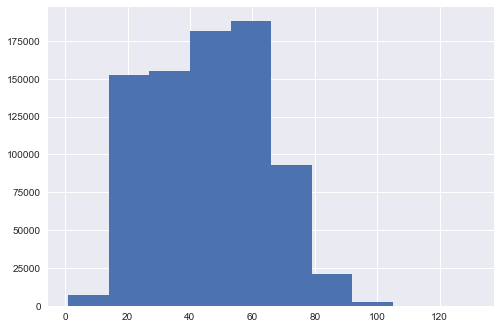

In [9]:
plt.hist(data_people['age'], bins=10)
plt.show()

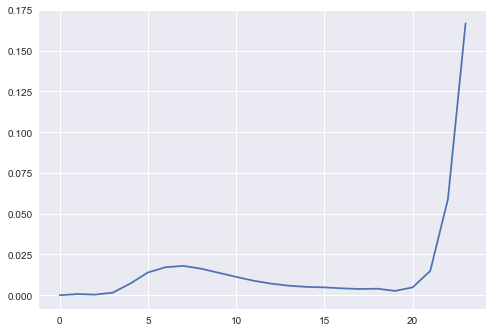

In [10]:
plt.plot(list(map (lambda x: len(data_people[(data_people['age']>= x) & (data_people['age']< x+10) & (data_people['suspicious'] == 1)])/len(data_people[(data_people['age']>= x) & (data_people['age']< x+10)]), range(0,120,5))))
plt.show()

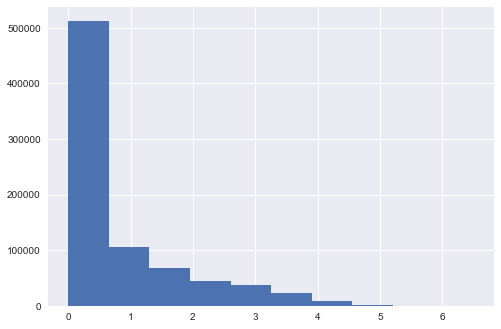

In [11]:
plt.hist(data_people['distinct_counterparties'].apply(lambda x: 0 if x==0 else math.log(x)))
plt.show()

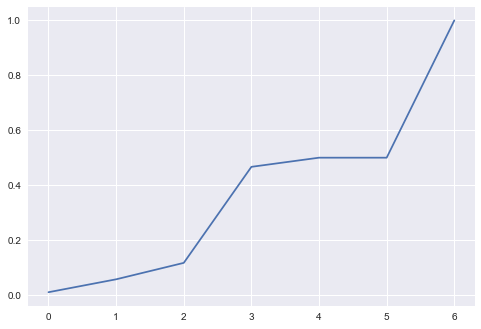

In [12]:
plt.plot(list(map (lambda x: len(data_people[(data_people['distinct_counterparties']>= x) & (data_people['distinct_counterparties']< x+100) & (data_people['suspicious'] == 1)])/len(data_people[(data_people['distinct_counterparties']>= x) & (data_people['distinct_counterparties']< x+100)]), range(0,700,100))))
plt.show()

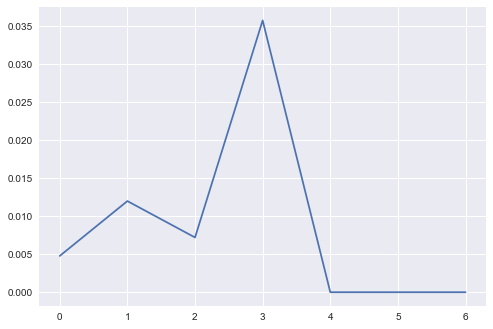

In [13]:
plt.plot(list(map (lambda x: len(data_companies[(data_companies['distinct_counterparties']>= x) & (data_companies['distinct_counterparties']< x+100) & (data_companies['suspicious'] == 1)])/len(data_companies[(data_companies['distinct_counterparties']>= x) & (data_companies['distinct_counterparties']< x+100)]), range(0,700,100))))
plt.show()

In [16]:
data_people = data_people.join(pandas.get_dummies(data_people['nationality']))

In [17]:
msk = np.random.rand(len(data_people)) < 0.8
data_people_train = data_people[msk]
data_people_valiadion = data_people[~msk]

In [18]:
data_people_train.head()

,customer,category,suspicious,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,...,66,94,113,117,123,134,141,172,176,191
2,90000002,0,0,11051.68,3.0,0.666667,77.0,191,0,35.74,...,0,0,0,0,0,0,0,0,0,1
4,90000004,0,0,205489.77,1.0,1.000000,39.0,172,0,147.53,...,0,0,0,0,0,0,0,1,0,0
5,90000005,0,0,279.73,3.0,0.333333,36.0,172,0,44.60,...,0,0,0,0,0,0,0,1,0,0
6,90000006,0,0,27879.68,1.0,0.000000,37.0,45,0,89.55,...,0,0,0,0,0,0,0,0,0,0
7,90000007,0,0,192441.04,105.0,0.352381,61.0,172,0,1.83,...,0,0,0,0,0,0,0,1,0,0


In [19]:
data_people_train["turnover_log"] = data_people_train["turnover"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_train["atm_withdrawal_log"] = data_people_train["atm_withdrawal"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_train["atm_deposit_log"] = data_people_train["atm_deposit"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_train["distinct_counterparties_log"] = data_people_train["distinct_counterparties"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_train['transaction_in'] = data_people_train[["transaction_count","io_ratio"]].apply(lambda x: x['transaction_count']*x['io_ratio'] ,axis=1)
data_people_train['transaction_out'] = data_people_train[["transaction_count","transaction_in"]].apply(lambda x: x['transaction_count']-x['transaction_in'] ,axis=1)
data_people_train["transaction_in_log"] = data_people_train["transaction_in"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_train["transaction_out_log"] = data_people_train["transaction_out"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_train["transaction_count_log"] = data_people_train["transaction_count"].apply(lambda x: 0 if x < 1 else math.log(x))

In [20]:
data_people_train.head()

,customer,category,suspicious,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,...,191,turnover_log,atm_withdrawal_log,atm_deposit_log,distinct_counterparties_log,transaction_in,transaction_out,transaction_in_log,transaction_out_log,transaction_count_log
2,90000002,0,0,11051.68,3.0,0.666667,77.0,191,0,35.74,...,1,9.310338,7.398119,2.852037,0.000000,2.0,1.0,0.693147,0.000000,1.098612
4,90000004,0,0,205489.77,1.0,1.000000,39.0,172,0,147.53,...,0,12.233152,8.635270,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000
5,90000005,0,0,279.73,3.0,0.333333,36.0,172,0,44.60,...,0,5.633825,3.722798,0.000000,1.098612,1.0,2.0,0.000000,0.693147,1.098612
6,90000006,0,0,27879.68,1.0,0.000000,37.0,45,0,89.55,...,0,10.235653,0.000000,4.008455,0.000000,0.0,1.0,0.000000,0.000000,0.000000
7,90000007,0,0,192441.04,105.0,0.352381,61.0,172,0,1.83,...,0,12.167545,8.777535,2.452153,1.609438,37.0,68.0,3.610918,4.219508,4.653960


In [21]:
mean_dict = {}
for col in [ 'turnover_log', 'atm_withdrawal_log',
       'atm_deposit_log', 'distinct_counterparties_log', 'transaction_in',
       'transaction_out', 'transaction_in_log', 'transaction_out_log',
       'transaction_count_log', 'atm_withdrawal', 'atm_deposit', 'distinct_counterparties', 'n_of_accounts',
        'transaction_count',"inactive_days_max", 'inactive_days_average', "turnover"]:
    mean = data_people_train[col].mean()
    std = data_people_train[col].std()
    mean_dict[col] = (mean,std)
    data_people_train[col] = data_people_train[col].apply(lambda x: (x-mean)/std)

In [22]:
mean_dict

{'atm_deposit': (1355.0384697720945, 14576.519186432673),
 'atm_deposit_log': (4.461727499662909, 2.8365227370481647),
 'atm_withdrawal': (61176.17269892191, 880264.7173619269),
 'atm_withdrawal_log': (7.053087536975671, 4.014084821738037),
 'distinct_counterparties': (4.873056435696212, 11.922082931668674),
 'distinct_counterparties_log': (0.6671550442722772, 1.082564286649802),
 'inactive_days_average': (47.077381008979785, 53.268639877265066),
 'inactive_days_max': (115.33069447528847, 79.50949233528361),
 'n_of_accounts': (1.9978715018970377, 0.9979374829347015),
 'transaction_count': (21.22412881714309, 40.46667870220548),
 'transaction_count_log': (1.644324123704831, 1.6488650081956966),
 'transaction_in': (6.3969078130424855, 12.482665984289811),
 'transaction_in_log': (0.9136532658520309, 1.2667531153992588),
 'transaction_out': (14.827221004100604, 28.26240155740952),
 'transaction_out_log': (1.3861187441695668, 1.5586526935162552),
 'turnover': (328608.9786061148, 2429056.004

In [23]:
data_people_train.head()

,customer,category,suspicious,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,...,191,turnover_log,atm_withdrawal_log,atm_deposit_log,distinct_counterparties_log,transaction_in,transaction_out,transaction_in_log,transaction_out_log,transaction_count_log
2,90000002,0,0,-0.130733,-0.450349,0.666667,77.0,191,0,-0.212834,...,1,-0.878400,0.085955,-0.567487,-0.616273,-0.352241,-0.489244,-0.174072,-0.889306,-0.330962
4,90000004,0,0,-0.050686,-0.499772,1.000000,39.0,172,0,1.885774,...,0,0.442580,0.394158,-1.572957,-0.616273,-0.432352,-0.524627,-0.721256,-0.889306,-0.997246
5,90000005,0,0,-0.135167,-0.450349,0.333333,36.0,172,0,-0.046507,...,0,-2.540018,-0.829651,-1.572957,0.398551,-0.432352,-0.453862,-0.721256,-0.444597,-0.330962
6,90000006,0,0,-0.123805,-0.499772,0.000000,37.0,45,0,0.797329,...,0,-0.460199,-1.757085,-0.159799,-0.616273,-0.512463,-0.489244,-0.721256,-0.889306,-0.997246
7,90000007,0,0,-0.056058,2.070243,0.352381,61.0,172,0,-0.849419,...,0,0.412929,0.429599,-0.708464,0.870417,2.451647,1.881396,2.129274,1.817845,1.825278


In [24]:
data_people_train['age_temp'] = data_people_train['age'].apply(lambda x: 0 if x<18 else(1 if x<49 else (2 if x<100 else 3)))
data_people_train = data_people_train.join(pandas.get_dummies(data_people_train['age_temp']))
data_people_train  = data_people_train.drop("age_temp", axis=1)

for col in ["age"]:
    mean = data_people_train[col].mean()
    std = data_people_train[col].std()
    mean_dict[col] = (mean,std)
    data_people_train[col] = data_people_train[col].apply(lambda x: (x-mean)/std)

In [25]:
data_people_train = data_people_train.drop("nationality", axis=1)

In [26]:
data_people_train = data_people_train.drop("category", axis=1)


In [27]:
data_people_train = data_people_train.drop("customer", axis=1)

In [28]:
data_people_train.head()

,suspicious,turnover,transaction_count,io_ratio,age,is_pep,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,...,distinct_counterparties_log,transaction_in,transaction_out,transaction_in_log,transaction_out_log,transaction_count_log,0,1,2,3
2,0,-0.130733,-0.450349,0.666667,1.737473,0,-0.212834,-0.544975,0.002133,-0.324864,...,-0.616273,-0.352241,-0.489244,-0.174072,-0.889306,-0.330962,0,0,1,0
4,0,-0.050686,-0.499772,1.000000,-0.348524,0,1.885774,0.410886,2.006266,-0.324864,...,-0.616273,-0.432352,-0.524627,-0.721256,-0.889306,-0.997246,0,1,0,0
5,0,-0.135167,-0.450349,0.333333,-0.513208,0,-0.046507,-0.318587,0.002133,-0.157108,...,0.398551,-0.432352,-0.453862,-0.721256,-0.444597,-0.330962,0,1,0,0
6,0,-0.123805,-0.499772,0.000000,-0.458313,0,0.797329,0.813353,0.002133,-0.324864,...,-0.616273,-0.512463,-0.489244,-0.721256,-0.889306,-0.997246,0,1,0,0
7,0,-0.056058,2.070243,0.352381,0.859158,0,-0.849419,0.008418,0.002133,0.010648,...,0.870417,2.451647,1.881396,2.129274,1.817845,1.825278,0,0,1,0


In [29]:
data_people_train.to_csv('people_train.csv')

In [30]:
data_people_valiadion["turnover_log"] = data_people_valiadion["turnover"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_valiadion["atm_withdrawal_log"] = data_people_valiadion["atm_withdrawal"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_valiadion["atm_deposit_log"] = data_people_valiadion["atm_deposit"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_valiadion["distinct_counterparties_log"] = data_people_valiadion["distinct_counterparties"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_valiadion['transaction_in'] = data_people_valiadion[["transaction_count","io_ratio"]].apply(lambda x: x['transaction_count']*x['io_ratio'] ,axis=1)
data_people_valiadion['transaction_out'] = data_people_valiadion[["transaction_count","transaction_in"]].apply(lambda x: x['transaction_count']-x['transaction_in'] ,axis=1)
data_people_valiadion["transaction_in_log"] = data_people_valiadion["transaction_in"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_valiadion["transaction_out_log"] = data_people_valiadion["transaction_out"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_valiadion["transaction_count_log"] = data_people_valiadion["transaction_count"].apply(lambda x: 0 if x < 1 else math.log(x))

In [31]:
for col in [ 'turnover_log', 'atm_withdrawal_log',
       'atm_deposit_log', 'distinct_counterparties_log', 'transaction_in',
       'transaction_out', 'transaction_in_log', 'transaction_out_log',
       'transaction_count_log', 'atm_withdrawal', 'atm_deposit', 'distinct_counterparties', 'n_of_accounts',
        'transaction_count',"inactive_days_max", 'inactive_days_average', "turnover"]:
    mean = mean_dict[col][0]
    std = mean_dict[col][1]
    data_people_valiadion[col] = data_people_valiadion[col].apply(lambda x: (x-mean)/std)

In [32]:
data_people_valiadion['age_temp'] = data_people_valiadion['age'].apply(lambda x: 0 if x<18 else(1 if x<49 else (2 if x<100 else 3)))
data_people_valiadion = data_people_valiadion.join(pandas.get_dummies(data_people_valiadion['age_temp']))

In [33]:
for col in ["age"]:
    mean = mean_dict[col][0]
    std = mean_dict[col][1]
    data_people_valiadion[col] = data_people_valiadion[col].apply(lambda x: (x-mean)/std)

In [34]:
data_people_valiadion = data_people_valiadion.drop("nationality", axis=1)
data_people_valiadion = data_people_valiadion.drop("age_temp", axis=1)

In [35]:
data_people_valiadion.head()

,customer,category,suspicious,turnover,transaction_count,io_ratio,age,is_pep,inactive_days_average,inactive_days_max,...,distinct_counterparties_log,transaction_in,transaction_out,transaction_in_log,transaction_out_log,transaction_count_log,0,1,2,3
0,90000000,0,0,0.167287,-0.351502,0.142857,1.847262,0,-0.421400,0.109035,...,1.038834,-0.432352,-0.312331,-0.721256,0.260251,0.182905,0,0,1,0
3,90000003,0,0,-0.122441,1.477163,0.308642,1.737473,0,-0.845289,-0.255701,...,0.024010,1.490314,1.456804,1.819788,1.693278,1.667890,0,0,1,0
12,90000012,0,0,-0.079622,-0.499772,0.000000,-1.885575,0,-0.354568,-1.085791,...,-0.616273,-0.512463,-0.489244,-0.721256,-0.889306,-0.997246,1,0,0,0
14,90000014,0,0,-0.125625,0.093308,0.280000,-0.568103,0,-0.721201,-0.029313,...,1.413375,0.048314,0.112261,0.814884,0.965098,0.954931,0,1,0,0
16,90000016,0,0,-0.125850,-0.227944,0.333333,-0.568103,0,-0.566513,-0.381473,...,0.024010,-0.192019,-0.241565,0.373112,0.444822,0.509795,0,1,0,0


In [36]:
data_people_valiadion = data_people_valiadion.drop("category", axis=1)

In [37]:
data_people_valiadion = data_people_valiadion.drop("customer", axis=1)

In [117]:
data_people_valiadion.to_csv('people_validate.csv')

# Test data

In [39]:
data_test =  pandas.read_csv("test.csv")

In [40]:
data_people_test = data_test[data_test['category'] == 0]

In [41]:
df = pandas.get_dummies(data_people_test['nationality'])
df.insert(9, 117, 0)
data_people_test = data_people_test.join(df)

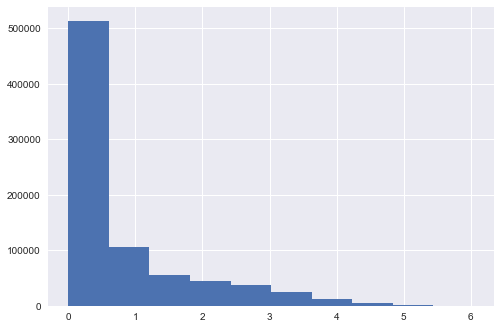

In [42]:
plt.hist(data_people_test['distinct_counterparties'].apply(lambda x: 0 if x==0 else math.log(x)))
plt.show()

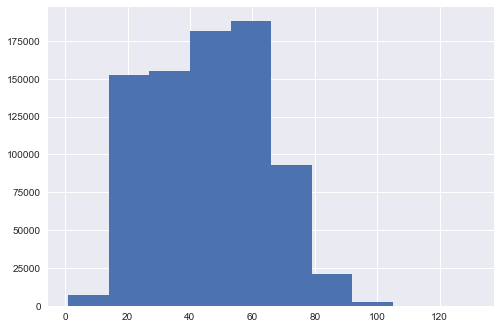

In [43]:
plt.hist(data_people['age'], bins=10)
plt.show()

In [44]:
data_people_test.head()

,customer,category,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,inactive_days_max,...,66,94,113,117,123,134,141,172,176,191
0,91000000,0,1235859.85,1.0,0.00,64.0,33,0,106.42,107.0,...,0,0,0,0,0,0,0,0,0,0
2,91000002,0,22003.25,4.0,0.25,41.0,33,0,30.94,62.0,...,0,0,0,0,0,0,0,0,0,0
3,91000003,0,72947.07,4.0,0.50,16.0,94,0,24.19,97.0,...,0,1,0,0,0,0,0,0,0,0
4,91000004,0,9964.06,1.0,0.00,46.0,50,0,47.84,48.0,...,0,0,0,0,0,0,0,0,0,0
5,91000005,0,4083.56,5.0,0.00,81.0,172,0,28.20,113.0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
data_people_test = data_people_test.drop("category", axis=1)
data_people_test = data_people_test.drop("customer", axis=1)
data_people_test["turnover_log"] = data_people_test["turnover"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_test["atm_withdrawal_log"] = data_people_test["atm_withdrawal"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_test["atm_deposit_log"] = data_people_test["atm_deposit"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_test["distinct_counterparties_log"] = data_people_test["distinct_counterparties"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_test['transaction_in'] = data_people_test[["transaction_count","io_ratio"]].apply(lambda x: x['transaction_count']*x['io_ratio'] ,axis=1)
data_people_test['transaction_out'] = data_people_test[["transaction_count","transaction_in"]].apply(lambda x: x['transaction_count']-x['transaction_in'] ,axis=1)
data_people_test["transaction_in_log"] = data_people_test["transaction_in"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_test["transaction_out_log"] = data_people_test["transaction_out"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_test["transaction_count_log"] = data_people_test["transaction_count"].apply(lambda x: 0 if x < 1 else math.log(x))

In [46]:
for col in [ 'turnover_log', 'atm_withdrawal_log',
       'atm_deposit_log', 'distinct_counterparties_log', 'transaction_in',
       'transaction_out', 'transaction_in_log', 'transaction_out_log',
       'transaction_count_log', 'atm_withdrawal', 'atm_deposit', 'distinct_counterparties', 'n_of_accounts',
        'transaction_count',"inactive_days_max", 'inactive_days_average', "turnover"]:
    mean =  mean_dict[col][0]
    std = mean_dict[col][1]
    data_people_test[col] = data_people_test[col].apply(lambda x: (x-mean)/std)

In [47]:
data_people_test['age_temp'] = data_people_test['age'].apply(lambda x: 0 if x<18 else(1 if x<49 else (2 if x<100 else 3)))
data_people_test = data_people_test.join(pandas.get_dummies(data_people_test['age_temp']))

In [48]:
data_people_test  = data_people_test.drop("age_temp", axis=1)
data_people_test  = data_people_test.drop("nationality", axis=1)

In [49]:
for col in ["age"]:
    mean = mean_dict[col][0]
    std = mean_dict[col][1]
    data_people_test[col] = data_people_test[col].apply(lambda x: (x-mean)/std)

In [50]:
data_people_valiadion.keys()[1:]

Index([                   'turnover',           'transaction_count',
                          'io_ratio',                         'age',
                            'is_pep',       'inactive_days_average',
                 'inactive_days_max',               'n_of_accounts',
           'distinct_counterparties',                'channel_risk',
                    'atm_withdrawal',                 'atm_deposit',
                                  18,                            32,
                                  33,                            45,
                                  47,                            50,
                                  66,                            94,
                                 113,                           117,
                                 123,                           134,
                                 141,                           172,
                                 176,                           191,
                      'turnover_lo

In [202]:
data_people_test.to_csv('people_test.csv')

# Data Companies

In [183]:
data_companies = data_companies.drop("customer", axis=1)

In [184]:
data_companies["turnover_log"] = data_companies["turnover"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies["atm_withdrawal_log"] = data_companies["atm_withdrawal"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies["atm_deposit_log"] = data_companies["atm_deposit"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies["distinct_counterparties_log"] = data_companies["distinct_counterparties"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies['transaction_in'] = data_companies[["transaction_count","io_ratio"]].apply(lambda x: x['transaction_count']*x['io_ratio'] ,axis=1)
data_companies['transaction_out'] = data_companies[["transaction_count","transaction_in"]].apply(lambda x: x['transaction_count']-x['transaction_in'] ,axis=1)
data_companies["transaction_in_log"] = data_companies["transaction_in"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies["transaction_out_log"] = data_companies["transaction_out"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies["transaction_count_log"] = data_companies["transaction_count"].apply(lambda x: 0 if x < 1 else math.log(x))

In [185]:
mean_dict_comapnies = {}
for col in [ 'turnover_log', 'atm_withdrawal_log',
       'atm_deposit_log', 'distinct_counterparties_log', 'transaction_in',
       'transaction_out', 'transaction_in_log', 'transaction_out_log',
       'transaction_count_log', 'atm_withdrawal', 'atm_deposit', 'distinct_counterparties', 'n_of_accounts',
        'transaction_count',"inactive_days_max", 'inactive_days_average', "turnover"]:
    mean = data_companies[col].mean()
    std = data_companies[col].std()
    mean_dict_comapnies[col] = (mean,std)
    data_companies[col] = data_companies[col].apply(lambda x: (x-mean)/std)

In [186]:
data_companies = data_companies.join(pandas.get_dummies(data_companies['nationality']))
data_companies  = data_companies.drop("nationality", axis=1)
data_companies['category'] = data_companies['category'].apply(lambda x: x-1)

In [187]:
data_companies.to_csv('final_train_companies.csv')

# Test companies

In [190]:
data_companies_test = data_test[data_test['category'] != 0]
data_companies_test = data_companies_test.drop("customer", axis=1)

In [191]:
data_companies_test["turnover_log"] = data_companies_test["turnover"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies_test["atm_withdrawal_log"] = data_companies_test["atm_withdrawal"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies_test["atm_deposit_log"] = data_companies_test["atm_deposit"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies_test["distinct_counterparties_log"] = data_companies_test["distinct_counterparties"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies_test['transaction_in'] = data_companies_test[["transaction_count","io_ratio"]].apply(lambda x: x['transaction_count']*x['io_ratio'] ,axis=1)
data_companies_test['transaction_out'] = data_companies_test[["transaction_count","transaction_in"]].apply(lambda x: x['transaction_count']-x['transaction_in'] ,axis=1)
data_companies_test["transaction_in_log"] = data_companies_test["transaction_in"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies_test["transaction_out_log"] = data_companies_test["transaction_out"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies_test["transaction_count_log"] = data_companies_test["transaction_count"].apply(lambda x: 0 if x < 1 else math.log(x))

In [192]:
for col in [ 'turnover_log', 'atm_withdrawal_log',
       'atm_deposit_log', 'distinct_counterparties_log', 'transaction_in',
       'transaction_out', 'transaction_in_log', 'transaction_out_log',
       'transaction_count_log', 'atm_withdrawal', 'atm_deposit', 'distinct_counterparties', 'n_of_accounts',
        'transaction_count',"inactive_days_max", 'inactive_days_average', "turnover"]:
    mean = mean_dict_comapnies[col][0]
    std = mean_dict_comapnies[col][1]
    data_companies_test[col] = data_companies_test[col].apply(lambda x: (x-mean)/std)

In [210]:
df_companies = pandas.get_dummies(data_companies_test['nationality']) 
df_companies.insert(5,66,0)

In [215]:
data_companies_test = data_companies_test.join(df_companies)

In [218]:
data_companies_test = data_companies_test.drop("nationality", axis=1)

In [219]:
data_companies_test = data_companies_test.drop("age", axis=1)

In [220]:
data_companies_test = data_companies_test.drop("is_pep", axis=1)

In [222]:
data_companies_test['category'] = data_companies_test['category'].apply(lambda x: x-1)

In [ ]:
data_companies_test.to_csv("final_test_companies.csv")